# Final Project

## INTRODUCTION:

*So far, 2020 has been a year marred by a slew of negative events. From Kobe Bryant's tragic death to the COVID-19 pandemic, this year was already shaping up to be a dumpster fire. But  There's more like  George Floyd who was assassinated in cold blood by Minneapolis police officers just as everybody felt 2020 couldn't get any worse. This incident sparked national uproar and became the most explosive  in US politics today, based on police brutality, institutional racism, and the role of government in inflicting change.


### Importing necessary libraries

In [51]:
#import the all neccessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset from csv file

In [52]:
df=pd.read_csv('fatal-police-shootings-data.csv')
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [53]:
df.describe()

,id,age
count,5416.000000,5181.000000
mean,3010.398264,37.117931
std,1695.786456,13.116135
min,3.000000,6.000000
25%,1545.750000,27.000000
50%,3009.500000,35.000000
75%,4486.250000,46.000000
max,5927.000000,91.000000


## Cleaning the data

In [54]:
df.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [55]:
df.shape

(5416, 14)


\

# cleaning the data 

In [6]:
# extracting the month and year from the date
df['year'] = pd.to_datetime(df['date']).dt.year
df['month'] = pd.to_datetime(df['date']).dt.month
# removing the null values
df.dropna(subset=['gender'], inplace=True)
df.dropna(subset=['race'], inplace=True)
df.dropna(subset=['armed'], inplace=True)
df.dropna(subset=['age'], inplace=True)
df.dropna(subset=['flee'], inplace=True)
df.isna().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
year                       0
month                      0
dtype: int64

## Data Analysis and  Visualization by using the Federal data set
### The results of people shot based on their race 

In [7]:
# the results based on their race 
race_df=df['race'].value_counts()
raceshots=race_df.to_frame()
raceshots.reset_index(level=0, inplace=True)
raceshots.columns=['Race','shots',]
raceshots.head()


,Race,shots
0,W,2253
1,B,1164
2,H,786
3,A,83
4,N,70


In [8]:
race_df

W    2253
B    1164
H     786
A      83
N      70
O      43
Name: race, dtype: int64

# people killed by race

<AxesSubplot:xlabel='Race', ylabel='shots'>

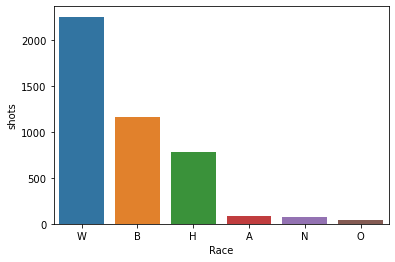

In [9]:
#total no of people killed by the race
sns.barplot(x='Race',y='shots',data=raceshots)

In [10]:
#Number of people killed as a respective races
races = ["A", "W", "H", "B", "N", "O"]
killed_per_race = []

for i in races:
    i_killings = df.race.loc[(df.race==i)].count()
    killed_per_race.append(i_killings)


In [11]:
print (killed_per_race)

[83, 2253, 786, 1164, 70, 43]


<AxesSubplot:xlabel='Race', ylabel='shots'>

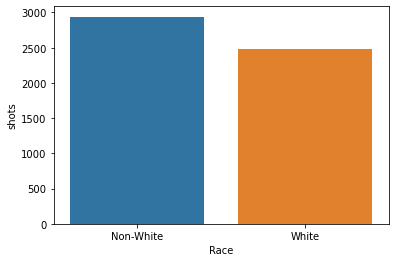

In [56]:
# analysis of the white and non-white people
race_df = df['race'].apply(lambda x: "White" if (x == "W") else "Non-White").value_counts()
shot1 = race_df.to_frame()
shot1.reset_index(level=0, inplace=True)
shot1.columns=['Race','shots']
shot1.head()
sns.barplot(x='Race', y='shots', data=shot1)

# Analysis by gender

# Number of polices killed 

# Removing Unessary Coloums

In [58]:
# exiting the unneccessary columns
data1 = df.drop(["id", "name", "date", "body_camera", "manner_of_death", "flee", "age", "city", "state"], 1)
data1 = data1[data1.threat_level != "undetermined"]
data1= data1[data1.armed != "undetermined"]
data1['threat_level'] = data1['threat_level'].apply(lambda x: 1 if (x == "attack") else 0)
data1['armed'] = data1['armed'].apply(lambda x: 1 if (x == "unarmed") else 0)

# converting the boolean values to the integers
data1['gender'] = data1['gender'].apply(lambda x: 1 if (x == "M") else 0)

# Dividing the 
data1['race'] = data1['race'].apply(lambda x: 1 if (x == "W") else 0)
data1['signs_of_mental_illness'] = data1['armed'].apply(lambda x: int(x))

# modified data set
print(data1.head())

   armed  gender  race  signs_of_mental_illness  threat_level
0      0       1     0                        0             1
1      0       1     1                        0             1
2      1       1     0                        1             0
3      0       1     1                        0             1
4      0       1     0                        0             1


## Building the Machine Learning Model for the Dataset

In [75]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [76]:
lr_model = LogisticRegression()

X = modify.drop("race", axis=1)
y = modify["race"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
params = {"max_iter": [100, 350], "C": [1.0, 3.0, 4]}

log_model = GridSearchCV(estimator=lr_model,
                                 param_grid=params,
                                 cv=5,
                                 scoring="accuracy")

print(log_model.fit(X_train, y_train))
print(log_model.best_params_)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 3.0, 4], 'max_iter': [100, 350]},
             scoring='accuracy')
{'C': 1.0, 'max_iter': 100}


In [78]:
print( log_model.best_score_)

0.5443595620066208


In [79]:
predictions = log_model.predict(X_test)
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.55      0.96      0.70       835
           1       0.53      0.06      0.10       697

    accuracy                           0.55      1532
   macro avg       0.54      0.51      0.40      1532
weighted avg       0.54      0.55      0.43      1532



In [80]:
log_accuracy_score = accuracy_score(y_test, predictions)
print(log_accuracy_score)

0.5483028720626631


## Conclusion


### We got an accuracy of 54 % for the test set. that means 54% of values in test set are predicted correctly.

## SUMMARY:

Initially, I believed race to be a significant factor, but according to the dataset, whites are killed more frequently than blacks.

Then I looked for signs that mental illness could be a factor, If the person was violated the rules the polics shots him in one case sinario in Polices there are some who are completly aganes for the rases 

But I reasoned that if the dataset had more features, we might compare them with other features and figure out why people were killed.

As a result, I attempted to predict on races,Gender and colour discrimination also i analysed the polices who are killed by the illeness people.

#### In this model I built a machine learning model using logistic regression had an accuracy of 50.597 percent.